In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = 4 + np.random.randn(100,1)
y = 6 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X]
theta1 = np.random.randn(2,1)

In [4]:
#Loinear Regression - (******1******)
n_iterations = 1000
m = 100
eta = 0.1
theta = theta1
for i in range(n_iterations):
    gradient = (1/m)*(X_b.T.dot(X_b.dot(theta) - y))  # Incorrect
    theta = theta - eta * gradient
print ("Calculated    - Linear Regression  ==> theta_0   : {}   :: theta_1      : {}".format(theta[0,0],theta[1,0]))

#Linear Regression (2)
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print ("Sklearn Nor   - Linear Regression  ==> Intercept : {}  :: Coef  : {}".format(lin_reg.intercept_[0],lin_reg.coef_[0,0],))


#SGDRegressor (3)
sgd_reg = SGDRegressor(n_iter=100,eta0=0.1)
sgd_reg.fit(X,y)
print ("Sklearn SGD   - Linear Regression  ==> Intercept : {}   :: Coef  : {}".format(sgd_reg.intercept_[0],sgd_reg.coef_[0]))


theta_l2 = theta1
lambda0 = 10000
#Calculation of Regularization (L2)
for i in range(n_iterations):
    gradient_l2 = (1/m) * (X_b.T.dot(X_b.dot(theta_l2) - y)) + (lambda0/m) * theta_l2
    theta_l2 = theta_l2 - eta * gradient_l2
print ("Calculated    - L2 Regularization  ==> theta_l2  : {}   :: theta_l2    : {}".format(theta_l2[0,0],theta_l2[1,0]))    


#Stocastic Gradient Descent (L2 Regularization) (4)
sgd_reg_l2 = SGDRegressor(n_iter=100,eta0=0.1,penalty='l2')
sgd_reg_l2.fit(X,y)
print ("Sklrean SGD   - L2 Regularization  ==> Intercept : {}  :: Coef  : {}".format(sgd_reg_l2.intercept_[0],sgd_reg_l2.coef_[0]))

#Ridge Linear Regression (5)
ridge_reg = Ridge()
ridge_reg.fit(X,y)
print ("Sklearn Ridge - L2 Regularization  ==> Intercept : {}    :: Coef  : {}".format(ridge_reg.intercept_[0],ridge_reg.coef_[0,0]))

Calculated    - Linear Regression  ==> theta_0   : 6.36359190663537   :: theta_1      : 2.9278665144739726
Sklearn Nor   - Linear Regression  ==> Intercept : 6.371036571428473  :: Coef  : 2.9260935730241506
Sklearn SGD   - Linear Regression  ==> Intercept : 6.339188464849488   :: Coef  : 2.9113772958133146
Calculated    - L2 Regularization  ==> theta_l2  : nan   :: theta_l2    : nan
Sklrean SGD   - L2 Regularization  ==> Intercept : 6.408505714985005  :: Coef  : 3.0485226301949555
Sklearn Ridge - L2 Regularization  ==> Intercept : 6.470739653853773    :: Coef  : 2.900689946717304


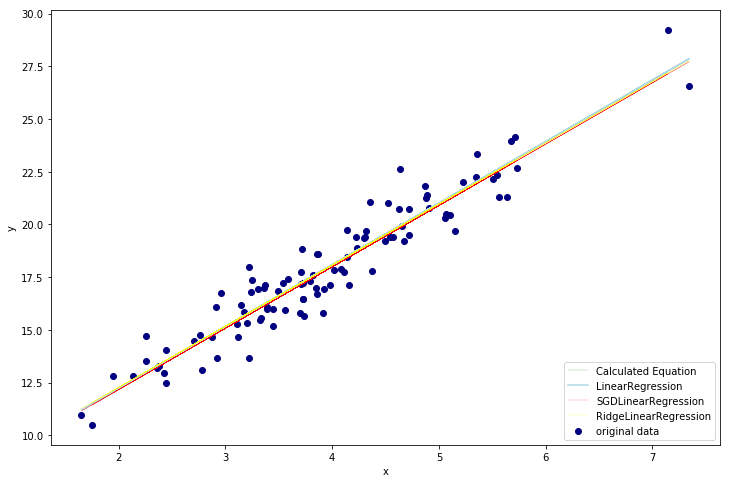

In [5]:
plt.subplots(figsize=(12,8))
plt.scatter(X,y,color='navy',marker='o',label='original data')
plt.plot(X,theta[0,0]+X*theta[1,0],color='green',linewidth=0.2,label='Calculated Equation')
plt.plot(X,lin_reg.intercept_+X*lin_reg.coef_,color='lightblue',label='LinearRegression')
plt.plot(X,sgd_reg.intercept_+X*sgd_reg.coef_,color='red',linewidth=0.2,label='SGDLinearRegression')
plt.plot(X,ridge_reg.intercept_+X*ridge_reg.coef_,color='yellow',linewidth=0.2,label='RidgeLinearRegression')
plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='lower right')

In [6]:
ridge_reg = Ridge(alpha=10000)
ridge_reg.fit(X,y)
print ("Sklearn Ridge - L2 Regularization  ==> Intercept : {}    :: Coef  : {}".format(ridge_reg.intercept_[0],ridge_reg.coef_[0,0]))

Sklearn Ridge - L2 Regularization  ==> Intercept : 17.72559438305339    :: Coef  : 0.033034135848584736


In [60]:
X = np.linspace(0,10,300)
X=X[:,np.newaxis]
def f(X):
    return 10 + np.sin(X)
y = f(X)

Linear Regression: [10.26518512] :: [[-0.01656296]]
Polynomail Regression:[10.89082895] :: [[ 0.         -0.39320894  0.0376646 ]]
Polynomail Regression:[11.33653335] :: [[ 0.         -0.93256132  0.17272805 -0.00900423]]
Polynomail Regression:[9.76953738] :: [[ 0.          2.24925426 -1.26467247  0.21483956 -0.01119219]]
Polynomail Regression:[9.44963436] :: [[ 0.00000000e+00  3.23191628e+00 -1.95713400e+00  3.99956030e-01
  -3.20350445e-02  8.33714194e-04]]
Polynomail Regression:[9.99987598] :: [[ 0.00000000e+00  1.00070142e+00  1.79670326e-03 -1.76091186e-01
   1.32504757e-02 -8.81198656e-04  3.68997455e-03 -1.09405638e-03
   1.29899412e-04 -7.12855293e-06  1.51017744e-07]]


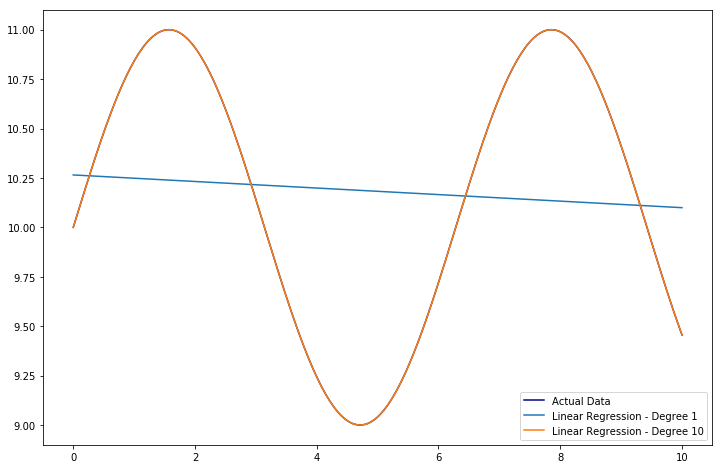

In [116]:
plt.subplots(figsize=(12,8))
plt.plot(X,y,color='navy',label='Actual Data')

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print ("Linear Regression: {} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
plt.plot(X,lin_reg.intercept_+lin_reg.coef_*X,label = 'Linear Regression - Degree 1')


from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2)
X_poly_2=poly_2.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly_2,y)
print("Polynomail Regression:{} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
#plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0,1]*X+lin_reg.coef_[0,2]*X**2,label='Linear Regression - Degree 2')


poly_3 = PolynomialFeatures(degree=3)
X_poly_3=poly_3.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly_3,y)
print("Polynomail Regression:{} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
#plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0,1]*X+lin_reg.coef_[0,2]*X**2+lin_reg.coef_[0,3]*X**3,label='Linear Regression - Degree 3')


poly_4 = PolynomialFeatures(degree=4)
X_poly_4=poly_4.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly_4,y)
print("Polynomail Regression:{} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
#plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0,1]*X+lin_reg.coef_[0,2]*X**2+lin_reg.coef_[0,3]*X**3+lin_reg.coef_[0,4]*X**4,label='Linear Regression - Degree 4')


poly_5 = PolynomialFeatures(degree=5)
X_poly_5=poly_5.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly_5,y)
print("Polynomail Regression:{} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
#plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0,1]*X+lin_reg.coef_[0,2]*X**2+lin_reg.coef_[0,3]*X**3+lin_reg.coef_[0,4]*X**4+lin_reg.coef_[0,5]*X**5,label='Linear Regression - Degree 5')


poly_10 = PolynomialFeatures(degree=10)
X_poly_10=poly_10.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly_10,y)
print("Polynomail Regression:{} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0,1]*X+lin_reg.coef_[0,2]*X**2+lin_reg.coef_[0,3]*X**3+lin_reg.coef_[0,4]*X**4+lin_reg.coef_[0,5]*X**5+lin_reg.coef_[0,6]*X**6+lin_reg.coef_[0,7]*X**7+lin_reg.coef_[0,8]*X**8+lin_reg.coef_[0,9]*X**9+lin_reg.coef_[0,10]*X**10,label='Linear Regression - Degree 10')



plt.legend(loc='lower right')



Ridge Regression: [10.24163627] :: [[-0.01185319]]
Polynomail Regression      :[9.76953738]  :: [[ 0.          2.24925426 -1.26467247  0.21483956 -0.01119219]]
Ridge Polynomail Regression:[10.25760418] :: [[ 0.00000000e+00 -8.74403638e-08 -4.66863037e-07 -1.93214374e-06
  -6.98764498e-06 -2.17917149e-05 -5.35306314e-05 -7.69465521e-05
   3.19870784e-05 -3.90336031e-06  1.52962784e-07]]


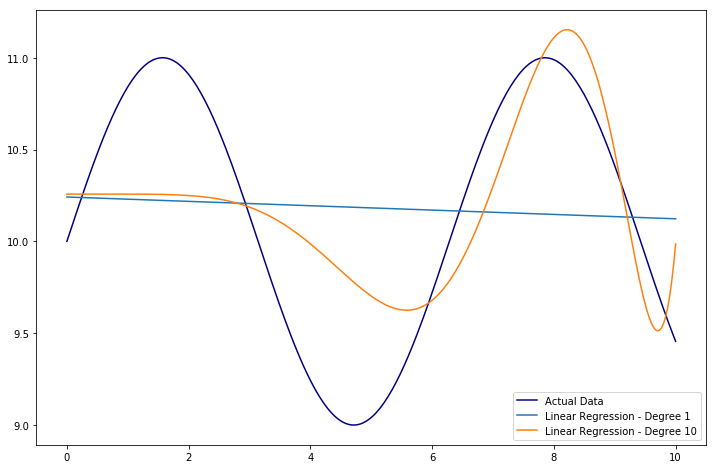

In [147]:
plt.subplots(figsize=(12,8))
plt.plot(X,y,color='navy',label='Actual Data')

from sklearn.linear_model import Ridge
lin_reg=Ridge(alpha=1000)
lin_reg.fit(X,y)
print ("Ridge Regression: {} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
plt.plot(X,lin_reg.intercept_+lin_reg.coef_*X,label = 'Linear Regression - Degree 1')


poly_4 = PolynomialFeatures(degree=4)
X_poly_4=poly_4.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly_4,y)
print("Polynomail Regression      :{}  :: {}".format(lin_reg.intercept_, lin_reg.coef_))
#plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0,1]*X+lin_reg.coef_[0,2]*X**2+lin_reg.coef_[0,3]*X**3+lin_reg.coef_[0,4]*X**4,label='Linear Regression - Degree 4')


poly_10 = PolynomialFeatures(degree=10)
X_poly_10=poly_10.fit_transform(X)
lin_reg=Ridge(alpha=1000000000)
lin_reg.fit(X_poly_10,y)
print("Ridge Polynomail Regression:{} :: {}".format(lin_reg.intercept_, lin_reg.coef_))
plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0,1]*X+lin_reg.coef_[0,2]*X**2+lin_reg.coef_[0,3]*X**3+lin_reg.coef_[0,4]*X**4+lin_reg.coef_[0,5]*X**5+lin_reg.coef_[0,6]*X**6+lin_reg.coef_[0,7]*X**7+lin_reg.coef_[0,8]*X**8+lin_reg.coef_[0,9]*X**9+lin_reg.coef_[0,10]*X**10,label='Linear Regression - Degree 10')



plt.legend(loc='lower right')


